# **1. Import Libraries**

Memanggil semua library yang diperlukan: pandas/numpy (data), seaborn/matplotlib (visual), sklearn (preprocessing, model, evaluasi), dan tensorflow/keras (single neuron demo) untuk manipulasi data, visualisasi, pembuatan model, dan evaluasi.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **2. Load dataset**

Dataset diimpor dari google drive MyDrive/GoogleColab_DeepLearning/VacationMountainVSBeach/mountains_vs_beaches_preferences.csv. Kemudian menampilkan 5 dataset teratas

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df = pd.read_csv('/content/drive/MyDrive/GoogleColab_DeepLearning/VacationMountainVSBeach/mountains_vs_beaches_preferences.csv', sep=';')
print("Shape after parsing:", df.shape)
display(df.head())
df.info()

Shape after parsing: (52444, 14)


,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


# **3. Menampilkan Dataset**

In [31]:
print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (52444, 14)


,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


# **4. Quick EDA: target & sebaran beberapa fitur**

EDA digunakan untuk lihat keseimbangan kelas (0/1). Lihat juga distribusi umur & penghasilan untuk pencerahan fitur.

Preference
0    39296
1    13148
Name: count, dtype: int64


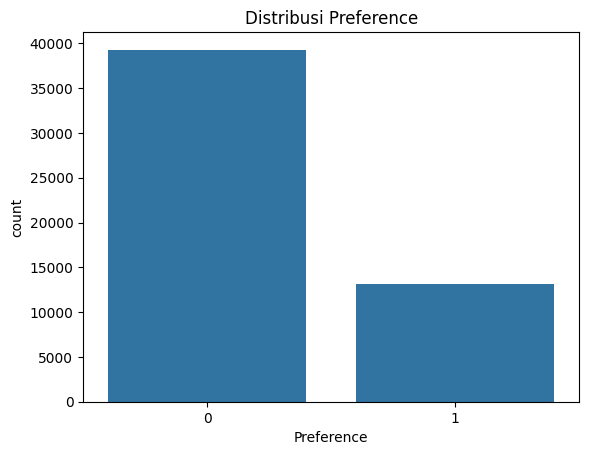

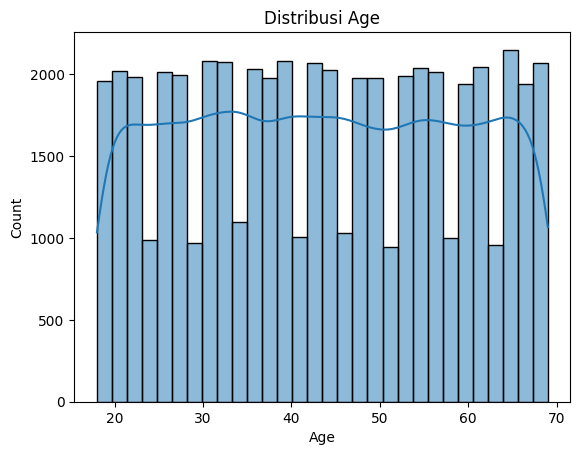

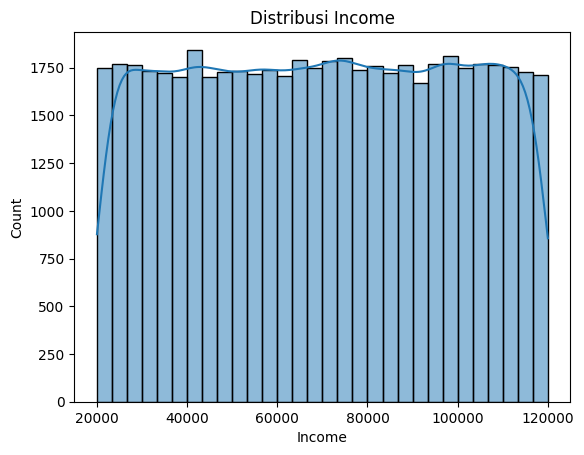

In [32]:
print(df['Preference'].value_counts())
sns.countplot(x='Preference', data=df); plt.title('Distribusi Preference'); plt.show()
sns.histplot(df['Age'], bins=30, kde=True); plt.title('Distribusi Age'); plt.show()
sns.histplot(df['Income'], bins=30, kde=True); plt.title('Distribusi Income'); plt.show()

# **5. Pilih fitur & encode kategori**

Memisahkan kolom numerik dan kategorikal untuk mengubah kategori ke one-hot supaya model bisa pakai. drop_first=True mengurangi kolinearitas.

In [33]:
numeric_cols = ['Age','Income','Travel_Frequency','Vacation_Budget','Proximity_to_Mountains','Proximity_to_Beaches','Pets','Environmental_Concerns']
cat_cols = ['Gender','Education_Level','Preferred_Activities','Location','Favorite_Season']

df_enc = pd.get_dummies(df[numeric_cols + cat_cols], columns=cat_cols, drop_first=True)
X = df_enc
y = df['Preference'].astype(int)
print("X shape:", X.shape)

X shape: (52444, 21)


# **6. Cek missing & scaling**

Untuk memastikan nggak ada missing; standarisasi fitur numerik supaya skala fitur seragam (penting untuk interpretasi koefisien dan training Keras).

In [34]:
print("Missing total:", X.isnull().sum().sum())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_in_X = [c for c in X.columns if c in numeric_cols]
X[num_in_X] = scaler.fit_transform(X[num_in_X])

Missing total: 0


# **7. Split train & test (stratify)**

Data dibagi menjadi 2, yaitu data training dan testing, data training sebesar 80% dan data testing sebesar 20%.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (41955, 21) Test: (10489, 21)


# **8. Latih Logistic Regression (linear model untuk 0/1)**

Logistic regression adalah linear model yang tepat untuk klasifikasi biner (menghasilkan probabilitas via sigmoid). max_iter ditingkatkan agar konvergen.

In [36]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]

# **9. Evaluasi model (metrik & visual)**

Menampilkan akurasi, precision/recall/F1; confusion matrix jelaskan salah/benar; ROC-AUC ukur kemampuan memisahkan kelas.

Accuracy: 0.9971398608065593
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7859
           1       1.00      0.99      0.99      2630

    accuracy                           1.00     10489
   macro avg       1.00      1.00      1.00     10489
weighted avg       1.00      1.00      1.00     10489



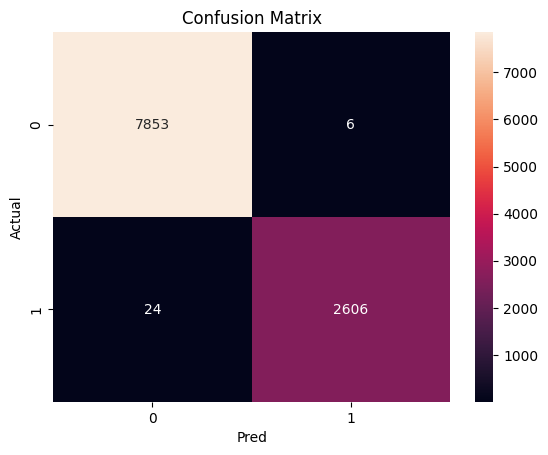

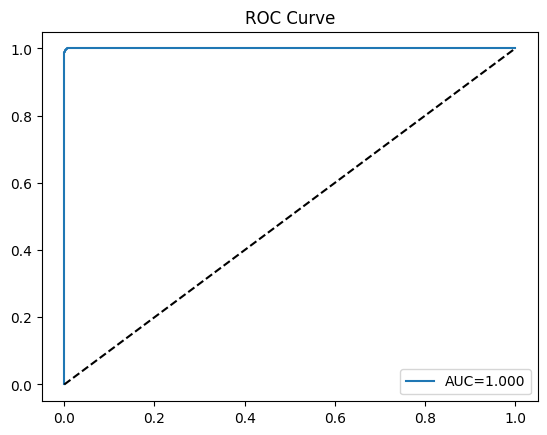

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); plt.xlabel('Pred'); plt.ylabel('Actual'); plt.show()

auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC={auc:.3f}'); plt.plot([0,1],[0,1],'k--'); plt.legend(); plt.title('ROC Curve'); plt.show()

# **10. Interpretasi koefisien (feature importance linear)**

*   Jika koefisien >0 → mendorong prediksi 1 (pilih gunung).
*   Jika <0 → mendorong 0 (pilih pantai).

Saat fitur numerik sudah discale, maka magnitudo koefisien bisa dibandingkan.

In [38]:
coef = pd.DataFrame({'feature': X.columns, 'coefficient': logreg.coef_[0]})
coef = coef.sort_values(by='coefficient', ascending=False)
display(coef.head(10))
display(coef.tail(10))

,feature,coefficient
5,Proximity_to_Beaches,7.362900
13,Preferred_Activities_skiing,0.094602
11,Education_Level_high school,0.089013
7,Environmental_Concerns,0.015682
2,Travel_Frequency,0.010501
0,Age,0.008434
6,Pets,-0.003922
1,Income,-0.009054
3,Vacation_Budget,-0.020406
8,Gender_male,-0.039932


,feature,coefficient
12,Education_Level_master,-0.043748
16,Location_suburban,-0.055922
18,Favorite_Season_spring,-0.075303
19,Favorite_Season_summer,-0.076998
9,Gender_non-binary,-0.101197
10,Education_Level_doctorate,-0.104080
17,Location_urban,-0.127528
4,Proximity_to_Mountains,-7.370790
15,Preferred_Activities_swimming,-24.473348
14,Preferred_Activities_sunbathing,-24.666573


# **11. Single Neuron (Keras) — versi neural-net setara**

Langkah ini dilakukan untuk melatih satu neuron sederhana di Keras agar bisa memprediksi dua kemungkinan, dan hasilnya menunjukkan konsep kerja yang sama seperti logistic regression.

In [39]:
model = Sequential([Dense(1, input_shape=[X_train.shape[1]], activation='sigmoid')])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.1, verbose=1)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Keras single neuron accuracy:", acc)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5774 - loss: 0.7311 - val_accuracy: 0.6296 - val_loss: 0.6555
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6560 - loss: 0.6216 - val_accuracy: 0.6918 - val_loss: 0.5772
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.5541 - val_accuracy: 0.7269 - val_loss: 0.5272
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7459 - loss: 0.5082 - val_accuracy: 0.7505 - val_loss: 0.4933
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7668 - loss: 0.4793 - val_accuracy: 0.7672 - val_loss: 0.4689
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7779 - loss: 0.4565 - val_accuracy: 0.7760 - val_loss: 0.4500
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7854 - loss: 0.4386 - val_accuracy: 0.7817 - val_loss: 0.4347
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4233 - val_accuracy: 0.7860 - val_loss: 0.4219
Ep

# **12. Visualisasi training Keras (loss curve)**

Cek konvergensi training/validation.

*   Kalau val_loss turun → model belajar.
*   kalau val_loss naik sementara train_loss turun → overfitting.

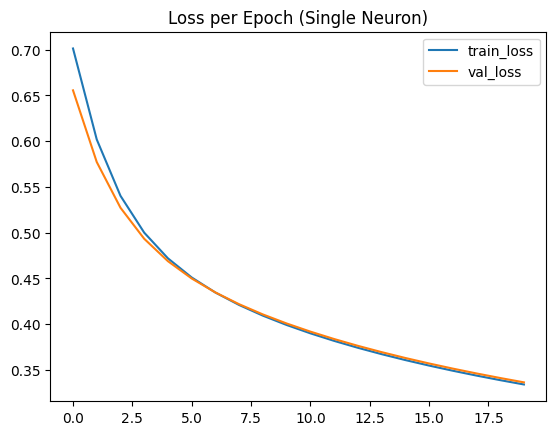

In [40]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss per Epoch (Single Neuron)'); plt.show()